# Jimmy Wrangler, Data Explorer

### __1. INDUSTRY__ 

__Literature__ industry is assigned.

### __2. DATA SETS__

__2.1. SOURCE__: The dataset is from [Kaggle](https://www.kaggle.com/datasets) in [this link](https://www.kaggle.com/kingburrito666/shakespeare-plays).

__DESCRIPTION__: The dataset contains about one hundred thousand data with attributes related to shakespeare's plays. The following attributes from the dataset will be used for analysis.

|Attribute       | Datatype     |
| :------------- | ----------: |
| Play | object   |
| PlayerLinenumber   | float64 |
|ActSceneLine| object|
|Player| object|
|PlayerLine | object||

### __3. IDEAS__

__3.1.__ To predict the player for a given player line using top three words from all lines and word used maximum in that line.

__3.2.__ To predict the player for a given player line from top three words from all lines and number of words in that line. 

### __4. LOADING THE DATASETS__

__Load the libraries__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Import the csv file of dataset__

In [2]:
shake_data=pd.read_csv("Shakespeare_data.csv")
shake_data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


### __5. DATA PREPARATION__

__5.1 DATA CLEANING__

__Drop the NaN rows__

In [3]:
shake_data=shake_data.dropna()
shake_data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


__Reset the index and drop the old index column__

In [4]:
shake_data=shake_data.reset_index()
del shake_data['index']
shake_data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


__Printing the dimension of the dataset__

In [5]:
print(shake_data.shape)

(105152, 6)


__Deleting the dataline and actsceneline column__

In [6]:
del shake_data['Dataline']
del shake_data['ActSceneLine']
shake_data.head()

,Play,PlayerLinenumber,Player,PlayerLine
0,Henry IV,1.0,KING HENRY IV,"So shaken as we are, so wan with care,"
1,Henry IV,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,Henry IV,1.0,KING HENRY IV,And breathe short-winded accents of new broils
3,Henry IV,1.0,KING HENRY IV,To be commenced in strands afar remote.
4,Henry IV,1.0,KING HENRY IV,No more the thirsty entrance of this soil


__Printing the dimension of the dataset__

In [7]:
print(shake_data.shape)

(105152, 4)


__5.2 FORMATTING__

__Attributes and datatypes of the dataset__

In [8]:
for column in shake_data.columns:
    print(column, " is ", shake_data[column].dtype.name)

Play  is  object
PlayerLinenumber  is  float64
Player  is  object
PlayerLine  is  object


__5.3 VISUALIZATION__

__Barplot for number of lines in each play__

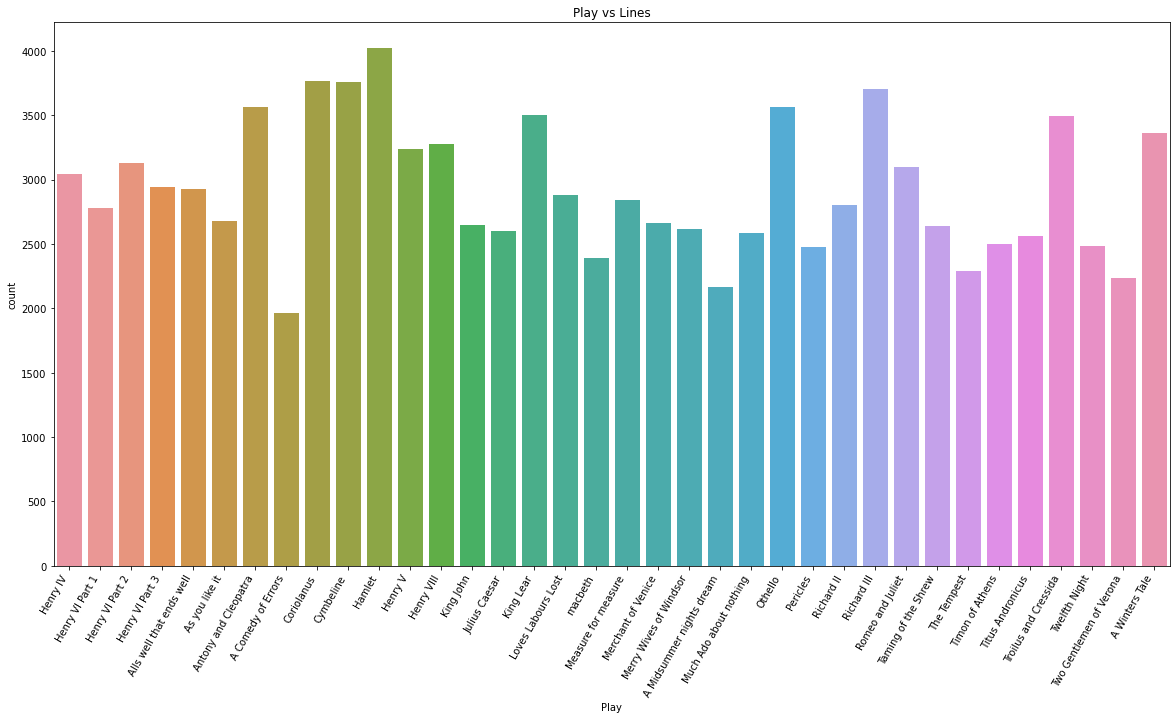

In [9]:
shake_data.Play.value_counts()
plt.figure(figsize=(20,10))
g = sns.countplot(x=shake_data['Play'], data=shake_data)
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right");
g.set_title('Play vs Lines');

__Barplot for Player vs number of lines for each play__

In [10]:
play_data=shake_data.Play.unique()
list1 = []
list2 =[]
for i in play_data:
    i_bar=shake_data.groupby(['Play']).get_group(i)
    player_data=i_bar.Player.unique()
    for j in player_data:
        j_bar=i_bar.groupby(['Player']).get_group(j)
        list1.append(j_bar.Player.unique()[0])
        list2.append(j_bar.PlayerLinenumber.max())
    df2 = pd.DataFrame(list(zip(list1, list2)), columns=['Player', 'Lines'])
    plt.figure(figsize=(20,5))
    i = sns.barplot(x=df2.Player, y=df2.Lines, data=df2)
    i.set_xticklabels(i.get_xticklabels(), rotation=60, ha="right"); 
    i.set_title(str(i_bar.Play.unique()[0])+" Players vs Lines");
    plt.savefig(str(i_bar.Play.unique()[0])+".png",dpi=250)
    plt.close()
    list1.clear()
    list2.clear()
    df2=df2.sort_values(['Lines'], ascending=[False])
    df2 = df2[df2['Lines'] <= (df2['Lines'].max()/4)]
    df2=df2.reset_index()
    df2.drop(['index'], inplace=True, axis=1)
    for k in range(len(df2)):
        shake_data.drop(shake_data.Player[shake_data['Player']==str(df2['Player'][k])].index, inplace=True)

In all the plays, the players with less than one-fourth of the player with maximum number of lines for each play is removed from the original dataset.

__Deleting PlayerLinernumber to release memory__

In [11]:
del shake_data['PlayerLinenumber']
print(shake_data.shape)

(85171, 3)


__5.4 FEATURE ENGINEERING__

__Three highly used words for each player__

In [12]:
# list for storing the player
player_count = []
# list for storing three most used words
words_used =[]
# new column for storing three most used words
shake_data['Words Count'] = ''
# assigning three most words in word count column for each row with respect to the player
for i in play_data:
    i_bar=shake_data.groupby(['Play']).get_group(i)
    player_data=i_bar.Player.unique()
    for j in player_data:
        j_bar=i_bar.groupby(['Player']).get_group(j)
        player_count.append(j_bar.Player.unique()[0])
        j_bar=j_bar.PlayerLine.str.split(expand=True).stack().value_counts().to_frame()
        j_bar=j_bar.reset_index()
        j_bar.drop(j_bar.index[0])
        j_bar=j_bar.reset_index()
        j_bar.drop(['level_0'], inplace=True, axis=1)
        j_bar.rename(columns={0: "Counts", "index": "Words"}, inplace=True)
        words_array=str(j_bar.Words.iloc[:3].values)[1:-1] 
        words_array=words_array.replace("'","")
        words_used.append(words_array)
        j_bar = pd.DataFrame(list(zip(player_count, words_used)), columns=['Player', 'Lines'])
        shake_data.loc[(shake_data['Player'] == j) & (shake_data['Play']==i), ['Words Count']] = words_array
shake_data.head()

,Play,Player,PlayerLine,Words Count
108,Henry IV,FALSTAFF,"Now, Hal, what time of day is it, lad?",I the a
120,Henry IV,FALSTAFF,"Indeed, you come near me now, Hal, for we that...",I the a
121,Henry IV,FALSTAFF,"purses go by the moon and the seven stars, and...",I the a
122,Henry IV,FALSTAFF,"by Phoebus, he,'that wandering knight so fair....",I the a
123,Henry IV,FALSTAFF,"I prithee, sweet wag, when thou art king, as, God",I the a


__Counting number of words for each player from the respective playerline__

In [13]:
# create number column to count number of words in playerline for all rows
shake_data['Number'] = ''
# assinging number of words in playerline in number column
for i in range(len(shake_data)):
            x=shake_data.iloc[i].PlayerLine.lower()
            words = len(x.split())
            shake_data.loc[(shake_data['PlayerLine'] == shake_data.iloc[i].PlayerLine), ['Number']] = words
shake_data.head()

,Play,Player,PlayerLine,Words Count,Number
108,Henry IV,FALSTAFF,"Now, Hal, what time of day is it, lad?",I the a,9
120,Henry IV,FALSTAFF,"Indeed, you come near me now, Hal, for we that...",I the a,11
121,Henry IV,FALSTAFF,"purses go by the moon and the seven stars, and...",I the a,11
122,Henry IV,FALSTAFF,"by Phoebus, he,'that wandering knight so fair....",I the a,8
123,Henry IV,FALSTAFF,"I prithee, sweet wag, when thou art king, as, God",I the a,10


__Finding the highest repeated word of a player speaks for each line of the player__

In [14]:
# create maxword column to count number of words in playerline for that rows
shake_data['Maxword'] = ''
# assigning maximum used word of a playline in the row
for i in range(len(shake_data)):
            x=shake_data.iloc[i].PlayerLine.lower()
            word_list=[]
            count_list=[]
            def word_count(str):
                counts = dict()
                words = str.split()
                for word in words:
                    word_list.append(word)
                    if word in counts:
                        counts[word] += 1
                    else:
                        counts[word] = 1
                    count_list.append(counts[word])
                return counts
            word_count(x)
            words_bar = pd.DataFrame(list(zip(word_list, count_list)), columns=['Word', 'Count'])
            words_bar=words_bar.sort_values(['Count', 'Word'], ascending=[False, True])
            words_bar=words_bar.reset_index()
            words_bar.drop(['index'], inplace=True, axis=1)
            words_bar=str(words_bar['Word'][0])
            shake_data.loc[(shake_data['PlayerLine'] == shake_data.iloc[i].PlayerLine), ['Maxword']] = str(words_bar)
shake_data.head()

,Play,Player,PlayerLine,Words Count,Number,Maxword
108,Henry IV,FALSTAFF,"Now, Hal, what time of day is it, lad?",I the a,9,day
120,Henry IV,FALSTAFF,"Indeed, you come near me now, Hal, for we that...",I the a,11,come
121,Henry IV,FALSTAFF,"purses go by the moon and the seven stars, and...",I the a,11,and
122,Henry IV,FALSTAFF,"by Phoebus, he,'that wandering knight so fair....",I the a,8,"and,"
123,Henry IV,FALSTAFF,"I prithee, sweet wag, when thou art king, as, God",I the a,10,art


__Dropping columns play and playerline to free memory__

In [15]:
del shake_data['Play']
del shake_data['PlayerLine']
shake_data.head()

,Player,Words Count,Number,Maxword
108,FALSTAFF,I the a,9,day
120,FALSTAFF,I the a,11,come
121,FALSTAFF,I the a,11,and
122,FALSTAFF,I the a,8,"and,"
123,FALSTAFF,I the a,10,art


__5.5 CLASSIFICATION__

__5.5.1 To predict the player for a given player line using top three words from all lines and word used maximum in that line.__

__Train, test and validation dataset for finding players from overall top three words and top word of each line__

In [30]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1
# define one hot encoding for the categorical independent variables
encoder = OneHotEncoder(sparse=False)
# transform data
x = encoder.fit_transform(shaken_data[['Words Count','Maxword']])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(shaken_data['Player'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test = 10% of the initial data set
# validation = 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

__Logistic regression for finding the player from overall top three words and top word of each line__

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(max_iter=61000).fit(x_train, y_train)
y_pred=clf.predict(x_test)
# Model Accuracy for test dataset
print("Testing Accuracy:",accuracy_score(y_test, y_pred)*100)

y_pred = clf.predict(x_val)
# Model Accuracy for validation dataset
print("Validation Accuracy:",accuracy_score(y_val, y_pred)*100)

Testing Accuracy: 87.1
Validation Accuracy: 86.4


__Decision tree classifier for finding the player from overall top three words and top word of each line__

In [32]:
from sklearn import tree
from sklearn.datasets import load_iris
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
# Model Accuracy for test dataset
print("Testing Accuracy:",accuracy_score(y_test, y_pred)*100)

y_pred = clf.predict(x_val)
# Model Accuracy for validation dataset
print("Validation Accuracy:",accuracy_score(y_val, y_pred)*100)

Testing Accuracy: 87.0
Validation Accuracy: 86.2


The player predicted using the overall top three words and top word of each line has higher accuracy in logistic regression than in decision tree.

__5.5.2 To predict the player for a given player line from top three words from all lines and number of words in that line.__ 

__Train, test and validation dataset for finding players from overall top three words and number of words in each line__

In [33]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# define one hot encoding and transformation
encoder = OneHotEncoder(sparse=False)
x = encoder.fit_transform(shake_data[['Number','Words Count']])

# define label encoding and transformation
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(shake_data['Player'])

# train = 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test = 10% of the initial data set
# validation = 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

__Logistic regression for finding the player from overall top three words and number of words in each line__

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(max_iter=61000).fit(x_train, y_train)
y_pred=clf.predict(x_test)
# Model Accuracy for test dataset
print("Testing Accuracy:",accuracy_score(y_test, y_pred)*100)

y_pred = clf.predict(x_val)
# Model Accuracy for validation dataset
print("Validation Accuracy:",accuracy_score(y_val, y_pred)*100)

Testing Accuracy: 46.47804648978634
Validation Accuracy: 46.44827991076671


__Decision trees classifier for finding the player from overall top three words and number of words in each line__

In [40]:
from sklearn import tree
from sklearn.datasets import load_iris
clf_d = tree.DecisionTreeClassifier()
clf_d= clf_d.fit(x_train, y_train)
y_pred = clf_d.predict(x_test)
# Model Accuracy for test set
print("Testing Accuracy:",accuracy_score(y_test, y_pred)*100)
y_pred = clf.predict(x_val)
# Model Accuracy for validation set
print("Validation Accuracy:",accuracy_score(y_val, y_pred)*100)

Testing Accuracy: 46.43108710965016
Validation Accuracy: 46.43653868733122


The player predicted using the overall top three words and top word of each line has higher accuracy in logistic regression than in decision tree.

__6. Results__

Predicting the player using overall top three words and most used word in each line gives more accuracy than predicting using overall top three words and number of words in each line.